# Extrair valores dos csvs contendo métricas calculadas

In [82]:
def getFormat(name):

    parts = name.split('_')
    model = parts[-1].replace('.csv', '')  # model name without .csv

    if "few-shot" in name:
        # Split the filename by underscore
        # Get the relevant parts (zero/few-shot, NA/RDF/verbalizado, model name)
        shot_type = parts[-4]  # zero-shot or few-shot
        data_type = parts[-3]  # NA, RDF or verbalizado

    else:
        
        if "zero-shot-triplas" in name:
            shot_type = "zero-shot-triplas"
            data_type = parts[-3]
        else:
            return f"{'_'.join(parts[1:-2])}_No_context_{model}"


    # Combine the parts
    return f"{'_'.join(parts[1:-4])}_{shot_type}_{data_type}_{model}"

In [83]:
import pandas as pd
import os

# Define the folder path
folder_path = '/Users/gabrielleite/Backup/QA-Promp-KG/qa-prompt-kg/metrics/data'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = {}

# Loop through each CSV file and read it into a DataFrame
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    key = getFormat(file)
    if key not in dfs:
        dfs[key] = []
    dfs[key].append(df)

# Concatenate all the DataFrames into one
combined_dfs = {}
df_total = []

for key, dataframes in dfs.items():
    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_dfs[key] = combined_df
    df_total.append(combined_df)

# Concatenate all combined DataFrames into one final DataFrame
combined_df_total = pd.concat(df_total, ignore_index=True)


/var/folders/dx/rq5ds3s11hj6bqbvv7rkhkv40000gn/T/ipykernel_46786/3633958944.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df_total = pd.concat(df_total, ignore_index=True)


In [84]:
combined_df_total.head()

,Question,Answer,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
0,Okay,so I need to generate 10 question and answer ...,0.00000,1.00000,1.00,0.0,3.29524,6.92021,0.96429,0.037
1,Now,I'll draft each question and ensure the answe...,0.00000,1.00000,1.00,0.0,6.83333,5.89142,0.93750,0.000
2,Another question might ask for examples of twi...,referencing the pairs given in the context.,1.88889,4.61384,1.00,0.0,3.50000,4.25402,0.85714,0.000
3,I should also include questions about specific...,like which OEIS sequence is associated with p...,3.50000,4.37319,1.00,0.0,6.22222,6.00792,0.94118,0.000
4,**Answer:** It states that every integer great...,uniquely up to the order.,4.00000,6.72160,0.96,0.0,2.00000,3.43523,1.00000,0.000


# Tabela com médias das métricas para cada setup

In [85]:
mean_combined_df_total = combined_df_total.drop(columns=['Question','Answer']).astype(float).mean()
mean_combined_dfs = {}
for key, combined_df in combined_dfs.items():
    mean_combined_dfs[key] = combined_df.drop(columns=['Question','Answer']).astype(float).mean()

In [86]:
full_data = pd.DataFrame(mean_combined_dfs).T.sort_index()
full_data.loc['Total'] = mean_combined_df_total.T

In [87]:
full_data.head()

,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
Amazon_rainforest_No_context_deepseek-r1:1.5b,1.350000,2.720057,1.000000,0.100000,5.668572,5.540914,0.980213,0.129300
Amazon_rainforest_No_context_deepseek-r1:14b,2.247144,4.704462,0.991735,0.239636,0.469697,1.872122,1.000000,0.121182
Amazon_rainforest_No_context_deepseek-r1:32b,2.201916,4.598643,1.000000,0.173300,1.122381,2.846516,0.992857,0.137500
Amazon_rainforest_No_context_deepseek-r1:7b,3.000000,2.500450,1.000000,0.000000,1.900000,4.613840,1.000000,0.000000
Amazon_rainforest_No_context_deepseek-r1:8b,0.000000,1.000000,1.000000,0.000000,0.622079,2.481511,0.987013,0.310545


In [88]:
# Altere o nome da coluna troacando '_' por
full_data.columns = full_data.columns.str.replace('_', '-')

In [89]:
full_data.describe()

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
count,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,1.995735,4.550610,0.973864,0.325100,1.085364,2.867726,0.985589,0.194627
std,0.549434,0.854182,0.037227,0.167371,0.730738,1.142224,0.022141,0.189931
min,0.000000,1.000000,0.600000,0.000000,0.000000,1.000000,0.798344,0.000000
25%,1.837512,4.321530,0.965377,0.227593,0.610985,2.043746,0.978409,0.050000
50%,2.085559,4.706864,0.983333,0.323100,0.915812,2.626387,1.000000,0.150000
75%,2.295050,5.019231,1.000000,0.417567,1.382869,3.523228,1.000000,0.283623
max,4.950816,7.911290,1.000000,1.000000,6.110525,7.774610,1.000000,2.000000


In [90]:
pd.set_option('display.max_rows', None)
full_data.head()

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
Amazon_rainforest_No_context_deepseek-r1:1.5b,1.350000,2.720057,1.000000,0.100000,5.668572,5.540914,0.980213,0.129300
Amazon_rainforest_No_context_deepseek-r1:14b,2.247144,4.704462,0.991735,0.239636,0.469697,1.872122,1.000000,0.121182
Amazon_rainforest_No_context_deepseek-r1:32b,2.201916,4.598643,1.000000,0.173300,1.122381,2.846516,0.992857,0.137500
Amazon_rainforest_No_context_deepseek-r1:7b,3.000000,2.500450,1.000000,0.000000,1.900000,4.613840,1.000000,0.000000
Amazon_rainforest_No_context_deepseek-r1:8b,0.000000,1.000000,1.000000,0.000000,0.622079,2.481511,0.987013,0.310545


In [101]:
full_data[full_data.index.str.contains("No_context_deepseek-r1:1.5b")].sort_index()

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
Amazon_rainforest_No_context_deepseek-r1:1.5b,1.350000,2.720057,1.000000,0.100000,5.668572,5.540914,0.980213,0.129300
Comutação_de_pacotes_No_context_deepseek-r1:1.5b,1.816667,3.320163,1.000000,0.075000,3.803312,4.905487,0.990740,0.064833
Construction_No_context_deepseek-r1:1.5b,1.366667,3.347085,0.983333,0.078300,1.990000,3.453199,1.000000,0.000000
Crise_petrolífera_de_1973_No_context_deepseek-r1:1.5b,1.318182,3.144162,1.000000,0.151455,2.675200,4.934244,0.965476,0.216818
Ctenophora_No_context_deepseek-r1:1.5b,2.023456,3.634243,1.000000,0.249100,1.882706,4.614160,0.979808,0.334500
Desigualdade_econômica_No_context_deepseek-r1:1.5b,2.448410,6.491010,0.954550,0.250000,2.444440,4.373190,1.000000,0.125000
Desobediência_civil_No_context_deepseek-r1:1.5b,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
Dinastia_Yuan_No_context_deepseek-r1:1.5b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direito_da_União_Europeia_No_context_deepseek-r1:1.5b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Escola_No_context_deepseek-r1:1.5b,2.075755,4.273710,0.944445,0.333500,0.250000,1.427830,1.000000,0.000000


# Tabelas

In [92]:
def get_short(name):

    parts = name.split('_')
    model = parts[-1]  # model name without .csv

    if "few-shot" in name:
        # Split the filename by underscore
        # Get the relevant parts (zero/few-shot, NA/RDF/verbalizado, model name)
        shot_type = parts[-3]  # zero-shot or few-shot
        data_type = parts[-2]  # NA, RDF or verbalizado

    else:
        
        if "zero-shot-triplas" in name:
            shot_type = "zero-shot-triplas"
            data_type = parts[-2]
        else:
            return f"No_context_{model}"


    # Combine the parts
    return f"{shot_type}_{data_type}_{model}"

full_data_no_term = full_data.drop(index='Total').groupby(full_data.drop(index='Total').index.map(get_short)).mean()
full_data_no_term.loc['Total'] = full_data.loc['Total']
len(full_data_no_term)

91

In [93]:
chosen = [
    'No_context_deepseek-r1:1.5b',              # Best Q-yngve
    'No_context_qwen2.5:32b',                   # Best A-yngve  
    'zero-shot-triplas_RDF_gemma3:27b',         # Best Q-trr
    'zero-shot-triplas_RDF_qwen3:8b',           # Best A-trr
    'zero-shot-triplas_verbalizado_phi4:14b',   # Best Q-brunet
    'No_context_qwen2.5:3b',                    # Best A-brunet
    'few-shot-triplas_RDF_gemma3:4b',           # Best Q-simple-word-ratio
    'few-shot-triplas_RDF_qwen3:32b'            # Best A-simple-word-ratio
]

best_cases = full_data_no_term[full_data_no_term.index.isin(chosen)].copy()
best_cases.loc['Total'] = full_data_no_term.loc['Total']
best_cases

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
No_context_deepseek-r1:1.5b,1.114238,2.678010,0.991969,0.282147,1.834067,3.334699,0.990073,0.324011
No_context_qwen2.5:32b,2.211247,4.912865,0.981215,0.371615,0.672505,2.360513,0.994397,0.190056
No_context_qwen2.5:3b,1.407658,3.762377,0.988970,0.480582,0.758693,2.730395,0.990646,0.248450
few-shot-triplas_RDF_gemma3:4b,1.945519,4.776849,0.958457,0.463067,0.914436,2.784281,0.984394,0.313395
few-shot-triplas_RDF_qwen3:32b,1.717985,4.891029,0.960506,0.343941,0.841899,2.432864,0.990480,0.257827
zero-shot-triplas_RDF_gemma3:27b,2.126260,4.889678,0.933411,0.250880,1.423372,2.991124,0.992494,0.140165
zero-shot-triplas_RDF_qwen3:8b,1.820542,4.164029,0.963461,0.296718,1.291487,3.098700,0.970380,0.287762
zero-shot-triplas_verbalizado_phi4:14b,2.397125,5.100097,0.983220,0.337721,0.876627,2.504771,0.990938,0.126465
Total,2.009877,4.500920,0.980131,0.333109,1.045565,2.937483,0.985504,0.197513


In [94]:
model_grouped = full_data_no_term.drop(index='Total').groupby(full_data_no_term.drop(index='Total').index.map(lambda x: x.split('_')[-1] if x != 'Total' else 'Total')).mean()
model_grouped.loc['Total'] = full_data.loc['Total']
model_grouped

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
deepseek-r1:1.5b,1.556781,3.300528,0.979170,0.325732,1.466998,2.926183,0.987630,0.309526
deepseek-r1:14b,1.950380,4.350748,0.981072,0.271766,1.213831,2.847439,0.987501,0.140332
deepseek-r1:32b,2.006967,4.444182,0.977045,0.280273,1.268979,2.966603,0.986398,0.145473
deepseek-r1:7b,1.860084,4.255301,0.975496,0.226626,1.413856,3.228511,0.981156,0.183121
deepseek-r1:8b,1.857563,4.427201,0.971288,0.319624,1.197530,3.221982,0.981754,0.220642
gemma3:12b,2.105910,4.762571,0.965783,0.368268,0.951297,2.814395,0.987588,0.205934
gemma3:27b,2.120201,4.737813,0.966799,0.399042,0.980666,2.647930,0.988825,0.185650
gemma3:4b,1.971443,4.578587,0.971132,0.375193,1.114169,3.010506,0.985161,0.241207
granite3.1-dense:8b,2.024997,4.604878,0.977725,0.299199,1.268776,3.356524,0.979422,0.210942
phi4:14b,2.206213,4.982411,0.970805,0.313975,0.986716,2.688897,0.989944,0.176200


In [95]:
def get_tecnique(index_name):
    if 'zero-shot-triplas' in index_name:
        return "Zero-shot triplas"
    elif 'few-shot' in index_name:
        return "Few-shot"
    elif 'No_context' in index_name:
        return "No context"
    else:
        return index_name

format_grouped = full_data.drop(index='Total').groupby(full_data.drop(index='Total').index.map(get_tecnique)).mean()
format_grouped.loc['Total'] = full_data.loc['Total']
format_grouped

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
Few-shot,2.029585,4.661670,0.974826,0.346860,0.959678,2.666444,0.987621,0.210509
No context,1.965035,4.460669,0.980731,0.371271,1.046036,3.069396,0.984364,0.221643
Zero-shot triplas,1.976427,4.481958,0.969447,0.279792,1.233575,2.972867,0.984123,0.164896
Total,2.009877,4.500920,0.980131,0.333109,1.045565,2.937483,0.985504,0.197513


In [96]:
def get_format(index_name):
    if 'RDF' in index_name:
        return "RDF"
    elif 'verbalizado' in index_name:
        return "Verbalizado"
    else:
        return "None"

format_grouped = full_data.drop(index='Total').groupby(full_data.drop(index='Total').index.map(get_format)).mean()
format_grouped.loc['Total'] = full_data.loc['Total']
format_grouped

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
None,1.965035,4.460669,0.980731,0.371271,1.046036,3.069396,0.984364,0.221643
RDF,1.891960,4.516304,0.964840,0.291811,1.268643,3.084493,0.983122,0.220301
Verbalizado,2.113818,4.628924,0.979439,0.335432,0.922825,2.553362,0.988640,0.155859
Total,2.009877,4.500920,0.980131,0.333109,1.045565,2.937483,0.985504,0.197513


In [97]:
full_data.head()

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
Amazon_rainforest_No_context_deepseek-r1:1.5b,1.350000,2.720057,1.000000,0.100000,5.668572,5.540914,0.980213,0.129300
Amazon_rainforest_No_context_deepseek-r1:14b,2.247144,4.704462,0.991735,0.239636,0.469697,1.872122,1.000000,0.121182
Amazon_rainforest_No_context_deepseek-r1:32b,2.201916,4.598643,1.000000,0.173300,1.122381,2.846516,0.992857,0.137500
Amazon_rainforest_No_context_deepseek-r1:7b,3.000000,2.500450,1.000000,0.000000,1.900000,4.613840,1.000000,0.000000
Amazon_rainforest_No_context_deepseek-r1:8b,0.000000,1.000000,1.000000,0.000000,0.622079,2.481511,0.987013,0.310545


In [103]:
def get_name(index_name):
    return ' '.join(index_name.split('_')[:-3])

format_grouped = full_data.drop(index='Total').groupby(full_data.drop(index='Total').index.map(get_name)).mean()
format_grouped.loc['Total'] = full_data.loc['Total']
format_grouped

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
Amazon rainforest,2.152379,4.530253,0.973307,0.302045,1.324651,3.207393,0.984948,0.176524
Comutação de pacotes,1.922879,4.861761,0.944553,0.291279,1.420374,3.917388,0.961161,0.274866
Construction,1.884210,4.485927,0.964313,0.388136,0.950260,2.660209,0.987315,0.212118
Crise petrolífera de 1973,2.207522,4.666228,0.985831,0.342105,1.267927,3.451190,0.973440,0.289172
Ctenophora,1.811215,4.091009,0.991710,0.336850,0.715875,2.516766,0.983962,0.150094
Desigualdade econômica,2.197066,4.870888,0.969622,0.286885,1.267618,3.377049,0.984740,0.210733
Desobediência civil,2.105446,4.896202,0.981934,0.411058,1.138587,3.007564,0.993212,0.182696
Dinastia Yuan,2.028709,4.460225,0.982106,0.245125,0.819182,2.260858,0.994993,0.078416
Direito da União Europeia,2.293297,4.876389,0.976938,0.327785,1.205158,3.237203,0.989418,0.279944
Escola,1.960049,4.795489,0.967530,0.398057,1.000195,2.746970,0.989602,0.308749


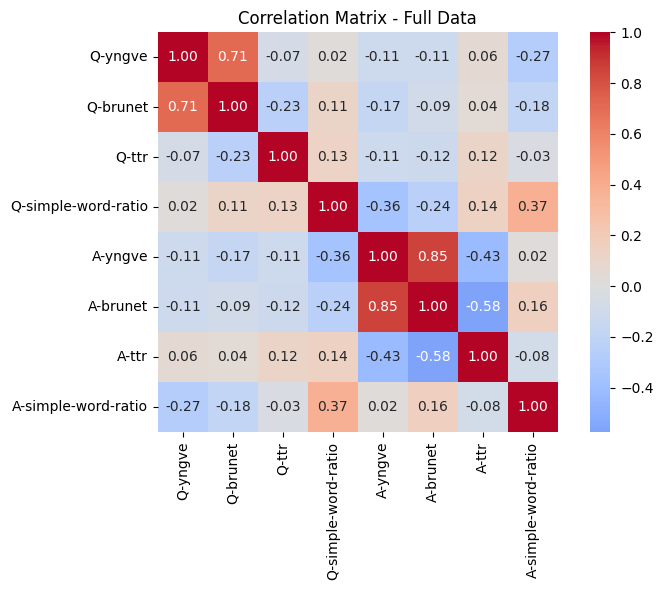

In [99]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = full_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix - Full Data')
plt.tight_layout()
plt.show()

In [100]:
# Sort full_data by model name (last part of the index after splitting by '_')
full_data_sorted = full_data_no_term.loc[full_data_no_term.index != 'Total'].copy()
full_data_sorted = full_data_sorted.loc[full_data_sorted.index.to_series().str.split('_').str[-1].sort_values().index]

# Add the Total row back at the end
full_data_sorted.loc['Total'] = full_data.loc['Total']
full_data_sorted

,Q-yngve,Q-brunet,Q-ttr,Q-simple-word-ratio,A-yngve,A-brunet,A-ttr,A-simple-word-ratio
No_context_deepseek-r1:1.5b,1.114238,2.678010,0.991969,0.282147,1.834067,3.334699,0.990073,0.324011
few-shot-triplas_verbalizado_deepseek-r1:1.5b,1.966880,4.272825,0.974901,0.379378,0.824681,2.174602,0.991881,0.238198
zero-shot-triplas_RDF_deepseek-r1:1.5b,1.876042,3.367469,0.971134,0.241236,2.142691,3.466376,0.983271,0.265914
few-shot-triplas_RDF_deepseek-r1:1.5b,1.389343,3.436914,0.978222,0.400351,1.068655,2.623711,0.987344,0.410268
zero-shot-triplas_verbalizado_deepseek-r1:1.5b,1.437400,2.747425,0.979622,0.325546,1.464899,3.031526,0.985583,0.309239
No_context_deepseek-r1:14b,2.081413,4.516260,0.985071,0.315359,0.839021,2.488946,0.993619,0.176959
few-shot-triplas_verbalizado_deepseek-r1:14b,2.024236,4.552181,0.986358,0.303146,1.068576,2.618633,0.984928,0.142313
zero-shot-triplas_RDF_deepseek-r1:14b,1.809580,3.944246,0.970410,0.156829,1.866339,3.531621,0.981848,0.120464
few-shot-triplas_RDF_deepseek-r1:14b,1.802265,4.233239,0.979701,0.250963,1.418181,3.130527,0.985233,0.151604
zero-shot-triplas_verbalizado_deepseek-r1:14b,2.034406,4.507815,0.983822,0.332531,0.877040,2.467466,0.991877,0.110323
